In [2]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Bibliothèques importées avec succès !")

✓ Bibliothèques importées avec succès !


In [3]:
# Chargement des données Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Afficher les premières lignes
print("=== PREMIÈRES LIGNES DU DATAFRAME ===")
display(df.head())

print("\n=== INFORMATIONS SUR LES DONNÉES ===")
print(f"Nombre d'observations : {df.shape[0]}")
print(f"Nombre de variables : {df.shape[1]}")
print(f"\nVariables : {list(df.columns)}")

=== PREMIÈRES LIGNES DU DATAFRAME ===


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa



=== INFORMATIONS SUR LES DONNÉES ===
Nombre d'observations : 150
Nombre de variables : 5

Variables : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species']


=== STATISTIQUES DESCRIPTIVES ===


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



=== RÉPARTITION DES ESPÈCES ===


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

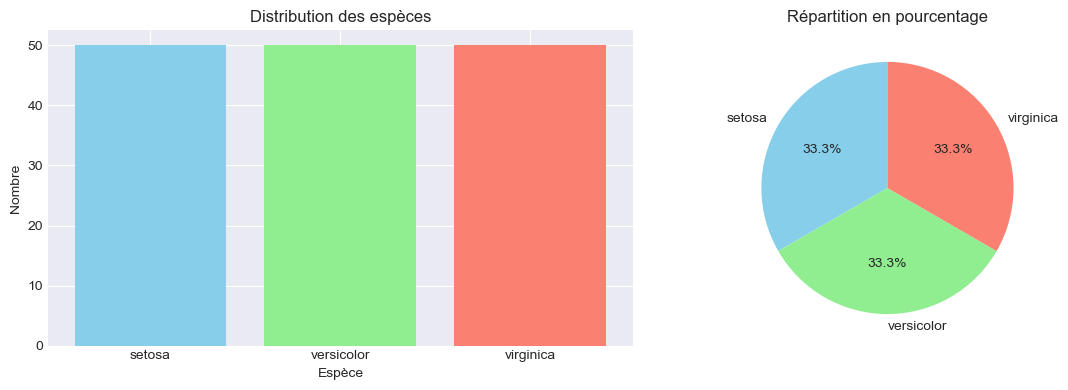

In [4]:
# Statistiques descriptives
print("=== STATISTIQUES DESCRIPTIVES ===")
display(df.describe())

# Répartition des espèces
print("\n=== RÉPARTITION DES ESPÈCES ===")
species_counts = df['species'].value_counts()
display(species_counts)

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Diagramme en barres
axes[0].bar(species_counts.index, species_counts.values, color=['skyblue', 'lightgreen', 'salmon'])
axes[0].set_title('Distribution des espèces')
axes[0].set_xlabel('Espèce')
axes[0].set_ylabel('Nombre')

# Diagramme circulaire
axes[1].pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%',
            colors=['skyblue', 'lightgreen', 'salmon'], startangle=90)
axes[1].set_title('Répartition en pourcentage')

plt.tight_layout()
plt.show()

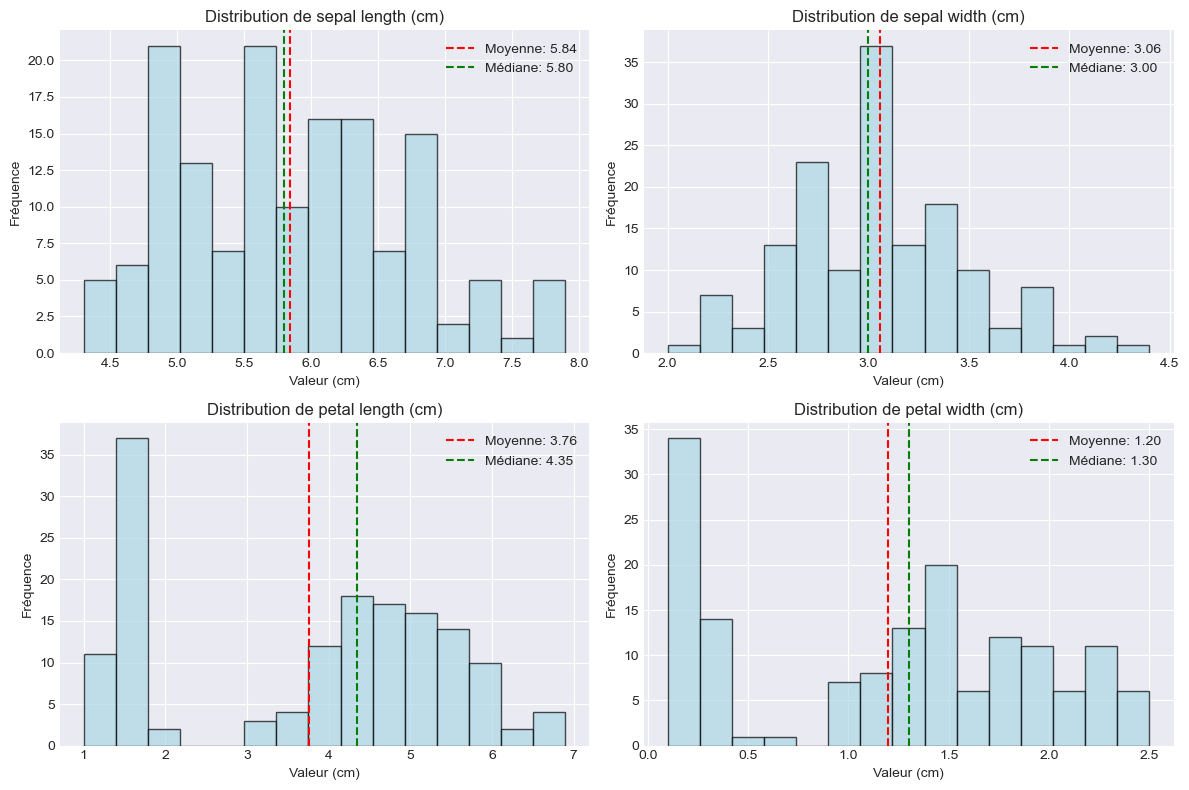

In [5]:
# Histogrammes pour chaque variable
variables = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, var in enumerate(variables):
    axes[i].hist(df[var], bins=15, color='lightblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution de {var}')
    axes[i].set_xlabel('Valeur (cm)')
    axes[i].set_ylabel('Fréquence')
    
    # Ajouter lignes statistiques
    mean_val = df[var].mean()
    median_val = df[var].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Moyenne: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', label=f'Médiane: {median_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

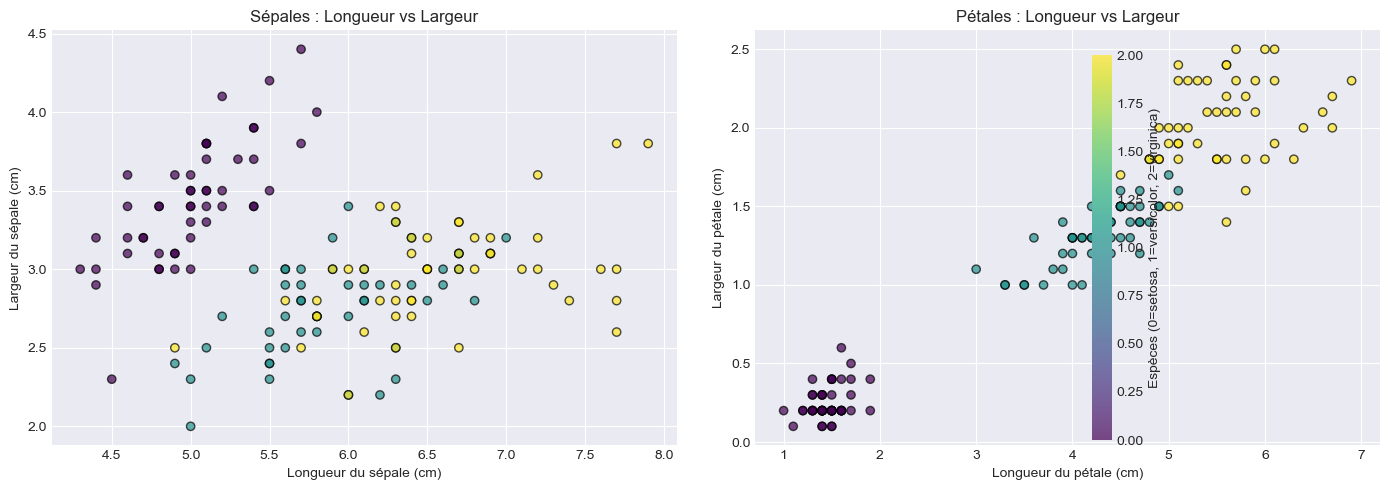

In [6]:
# Nuage de points avec coloration par espèce
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sépales
scatter1 = axes[0].scatter(df['sepal length (cm)'], df['sepal width (cm)'],
                          c=df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}),
                          cmap='viridis', alpha=0.7, edgecolor='black')
axes[0].set_title('Sépales : Longueur vs Largeur')
axes[0].set_xlabel('Longueur du sépale (cm)')
axes[0].set_ylabel('Largeur du sépale (cm)')

# Pétales
scatter2 = axes[1].scatter(df['petal length (cm)'], df['petal width (cm)'],
                          c=df['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2}),
                          cmap='viridis', alpha=0.7, edgecolor='black')
axes[1].set_title('Pétales : Longueur vs Largeur')
axes[1].set_xlabel('Longueur du pétale (cm)')
axes[1].set_ylabel('Largeur du pétale (cm)')

plt.colorbar(scatter2, ax=axes, label='Espèces (0=setosa, 1=versicolor, 2=virginica)')
plt.tight_layout()
plt.show()

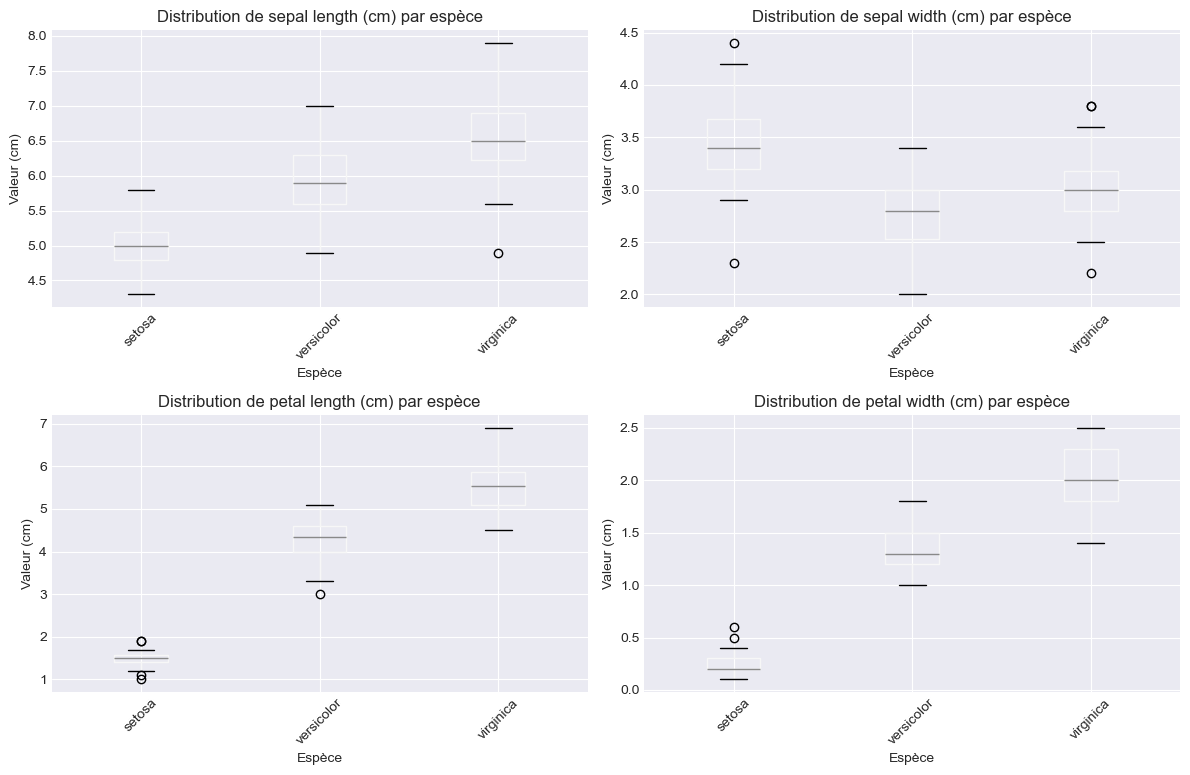

In [7]:
# Boxplots pour chaque variable par espèce
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, var in enumerate(variables):
    df.boxplot(column=var, by='species', ax=axes[i])
    axes[i].set_title(f'Distribution de {var} par espèce')
    axes[i].set_xlabel('Espèce')
    axes[i].set_ylabel('Valeur (cm)')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('')  # Supprime le titre automatique
plt.tight_layout()
plt.show()

=== MATRICE DE CORRÉLATION ===


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


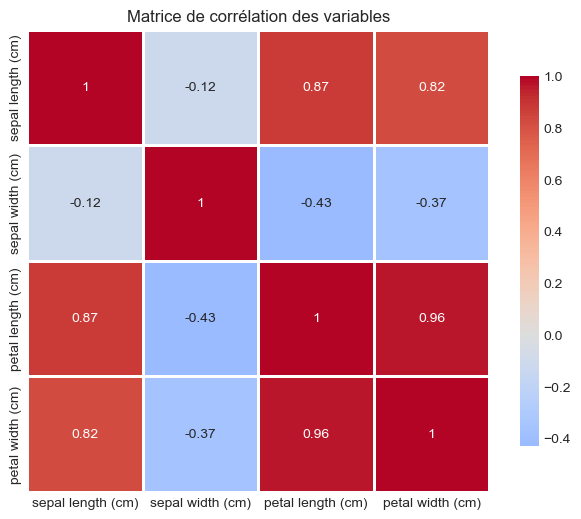

In [8]:
# Calcul de la matrice de corrélation
corr_matrix = df.iloc[:, :-1].corr()

print("=== MATRICE DE CORRÉLATION ===")
display(corr_matrix)

# Visualisation
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de corrélation des variables')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparation des données
X = df.drop('species', axis=1)
y = df['species']

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=== PRÉPARATION DES DONNÉES ===")
print(f"Taille de l'ensemble d'entraînement : {X_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}")
print(f"Proportions dans y_train :")
print(y_train.value_counts(normalize=True))

=== PRÉPARATION DES DONNÉES ===
Taille de l'ensemble d'entraînement : (120, 4)
Taille de l'ensemble de test : (30, 4)
Proportions dans y_train :
species
setosa        0.333333
virginica     0.333333
versicolor    0.333333
Name: proportion, dtype: float64


=== MODÈLE KNN ===
Exactitude : 93.33%

Rapport de classification :
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



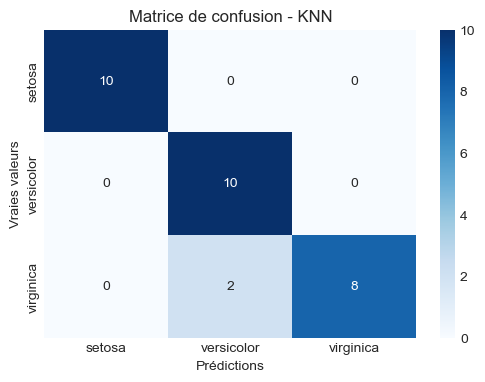

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Création et entraînement du modèle
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Prédictions
y_pred = knn.predict(X_test_scaled)

# Évaluation
accuracy = accuracy_score(y_test, y_pred)

print("=== MODÈLE KNN ===")
print(f"Exactitude : {accuracy:.2%}")
print(f"\nRapport de classification :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matrice de confusion - KNN')
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille de paramètres
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Recherche des meilleurs paramètres
knn_base = KNeighborsClassifier()
grid_search = GridSearchCV(knn_base, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("=== OPTIMISATION KNN ===")
print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleur score (validation croisée) : {grid_search.best_score_:.2%}")

# Évaluation du modèle optimisé
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"\nExactitude sur l'ensemble de test : {accuracy_best:.2%}")

=== OPTIMISATION KNN ===
Meilleurs paramètres : {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Meilleur score (validation croisée) : 96.67%

Exactitude sur l'ensemble de test : 93.33%


=== COMPARAISON DES MODÈLES ===


,Modèle,Exactitude,CV Moyenne,CV Écart-type
4,SVM,0.966667,0.966667,0.031180
3,Naive Bayes,0.966667,0.958333,0.026352
0,KNN,0.933333,0.958333,0.037268
2,Decision Tree,0.933333,0.941667,0.020412
1,Logistic Regression,0.933333,0.958333,0.026352


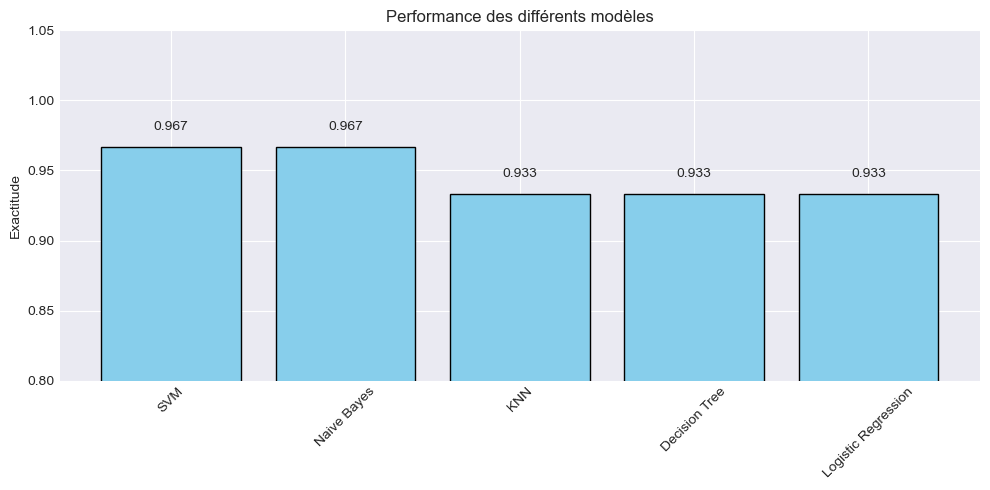

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Liste des modèles à comparer
models = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42)
}

# Comparaison
results = []
for name, model in models.items():
    # Entraînement
    model.fit(X_train_scaled, y_train)
    
    # Prédiction
    y_pred_model = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_model)
    
    # Validation croisée
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    
    results.append({
        'Modèle': name,
        'Exactitude': accuracy,
        'CV Moyenne': cv_scores.mean(),
        'CV Écart-type': cv_scores.std()
    })

# Affichage des résultats
results_df = pd.DataFrame(results).sort_values('Exactitude', ascending=False)
print("=== COMPARAISON DES MODÈLES ===")
display(results_df)

# Visualisation
fig, ax = plt.subplots(figsize=(10, 5))
x_pos = np.arange(len(results_df))
ax.bar(x_pos, results_df['Exactitude'], color='skyblue', edgecolor='black')
ax.set_xticks(x_pos)
ax.set_xticklabels(results_df['Modèle'], rotation=45)
ax.set_ylabel('Exactitude')
ax.set_title('Performance des différents modèles')
ax.set_ylim([0.8, 1.05])

# Ajouter les valeurs sur les barres
for i, v in enumerate(results_df['Exactitude']):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [13]:
# Fonction pour faire des prédictions manuelles
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    """Prédit l'espèce d'iris basée sur les mesures fournies."""
    # Création d'un DataFrame avec les mesures
    input_data = pd.DataFrame({
        'sepal length (cm)': [sepal_length],
        'sepal width (cm)': [sepal_width],
        'petal length (cm)': [petal_length],
        'petal width (cm)': [petal_width]
    })
    
    # Normalisation
    input_scaled = scaler.transform(input_data)
    
    # Prédiction avec le meilleur modèle
    prediction = best_knn.predict(input_scaled)[0]
    probabilities = best_knn.predict_proba(input_scaled)[0]
    
    # Affichage des résultats
    print(f"\n🌺 PRÉDICTION POUR VOS MESURES :")
    print(f"   Sepale : {sepal_length} cm x {sepal_width} cm")
    print(f"   Pétale : {petal_length} cm x {petal_width} cm")
    print(f"\n🔮 Espèce prédite : {prediction.upper()}")
    
    print("\n📊 Probabilités :")
    for species, prob in zip(best_knn.classes_, probabilities):
        print(f"   {species}: {prob:.1%}")
    
    return prediction

# Exemple de prédiction
print("=== EXEMPLE DE PRÉDICTION ===")
predict_iris(5.1, 3.5, 1.4, 0.2)

=== EXEMPLE DE PRÉDICTION ===

🌺 PRÉDICTION POUR VOS MESURES :
   Sepale : 5.1 cm x 3.5 cm
   Pétale : 1.4 cm x 0.2 cm

🔮 Espèce prédite : SETOSA

📊 Probabilités :
   setosa: 100.0%
   versicolor: 0.0%
   virginica: 0.0%


'setosa'

=== PAIRPLOT COMPLET ===


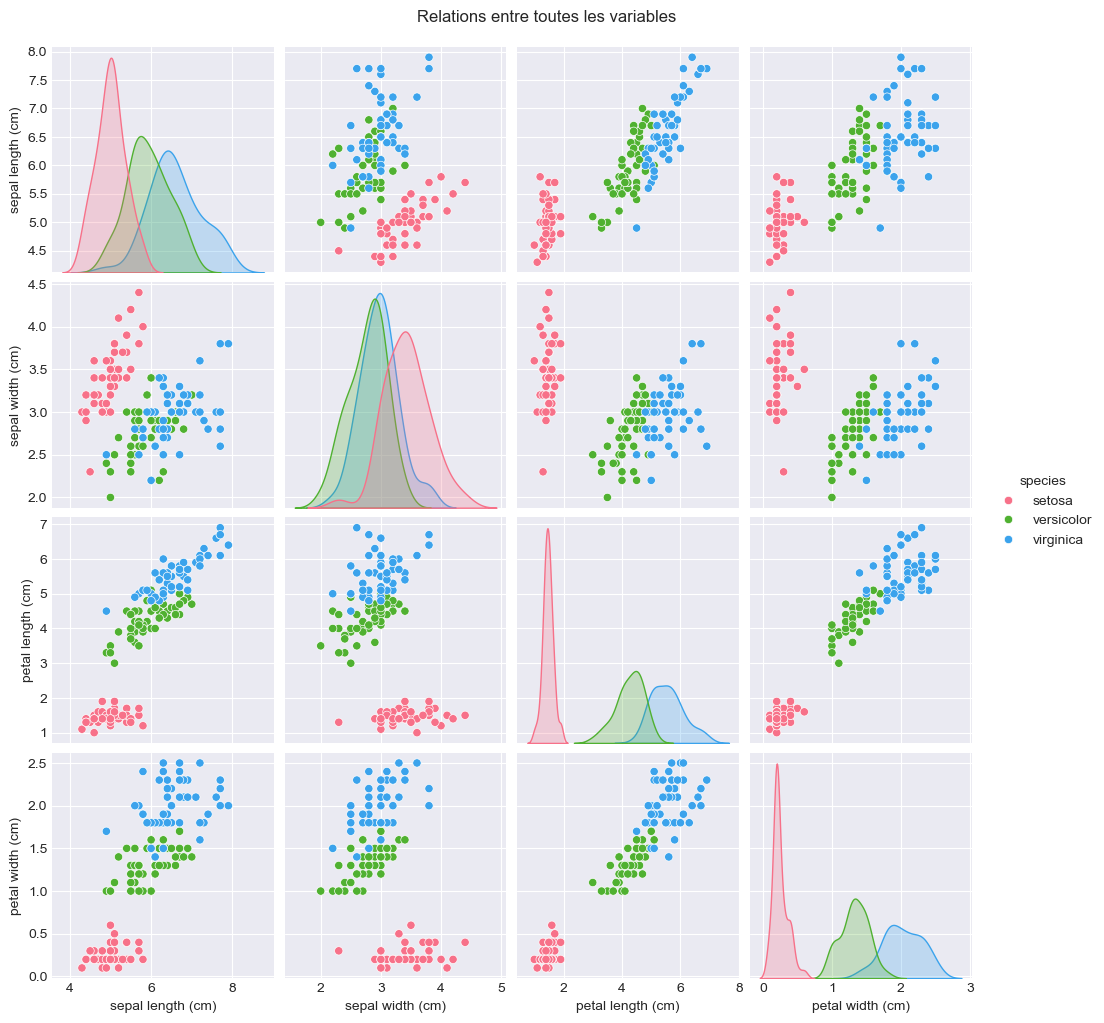

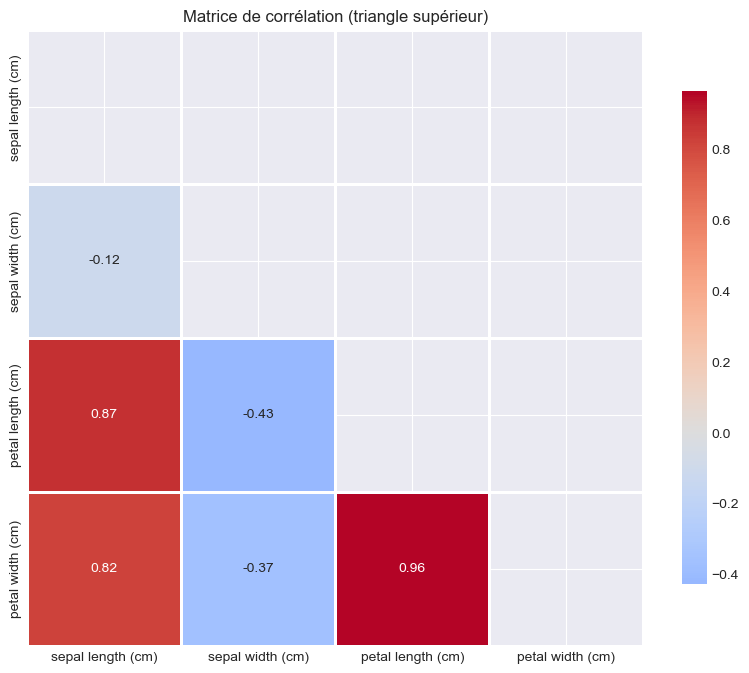

In [14]:
# Pairplot (nécessite seaborn)
print("=== PAIRPLOT COMPLET ===")
sns.pairplot(df, hue='species', palette='husl', height=2.5)
plt.suptitle('Relations entre toutes les variables', y=1.02)
plt.show()

# Heatmap des corrélations avec annotations
plt.figure(figsize=(10, 8))
corr = df.iloc[:, :-1].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de corrélation (triangle supérieur)')
plt.show()

In [15]:
import pickle

# Sauvegarde du modèle
with open('iris_knn_model.pkl', 'wb') as f:
    pickle.dump(best_knn, f)

# Sauvegarde du scaler
with open('iris_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("=== CONCLUSION DU TP ===")
print("✓ Modèle KNN sauvegardé : iris_knn_model.pkl")
print("✓ Scaler sauvegardé : iris_scaler.pkl")
print("\n📊 RÉSUMÉ DES RÉSULTATS :")
print(f"- Meilleur modèle : {type(best_knn).__name__}")
print(f"- Exactitude : {accuracy_best:.2%}")
print(f"- Paramètres optimaux : {grid_search.best_params_}")

print("\n🎯 ACQUIS DU TP :")
print("1. Exploration des données ✓")
print("2. Visualisation avec matplotlib/seaborn ✓")
print("3. Préparation des données ✓")
print("4. Entraînement de modèles ✓")
print("5. Évaluation et optimisation ✓")
print("6. Sauvegarde du modèle ✓")

=== CONCLUSION DU TP ===
✓ Modèle KNN sauvegardé : iris_knn_model.pkl
✓ Scaler sauvegardé : iris_scaler.pkl

📊 RÉSUMÉ DES RÉSULTATS :
- Meilleur modèle : KNeighborsClassifier
- Exactitude : 93.33%
- Paramètres optimaux : {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}

🎯 ACQUIS DU TP :
1. Exploration des données ✓
2. Visualisation avec matplotlib/seaborn ✓
3. Préparation des données ✓
4. Entraînement de modèles ✓
5. Évaluation et optimisation ✓
6. Sauvegarde du modèle ✓


In [1]:
import pickle
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Charger les données
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Préparation des données
X = df.drop('species', axis=1)
y = df['species']

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Entraînement du modèle
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Sauvegarder le modèle
with open('iris_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

# Sauvegarder le scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("✅ Modèle et scaler sauvegardés !")
print("Fichiers créés : iris_model.pkl et scaler.pkl")

✅ Modèle et scaler sauvegardés !
Fichiers créés : iris_model.pkl et scaler.pkl
